# Glauber on infinite random $k$-regular graph
Compute magnetization in the thermodynamic limit $N\to\infty$.

Reproduce the results in *Barthel et. al*, [Matrix product algorithm for stochastic dynamics on networks applied to nonequilibrium Glauber dynamics](https://doi.org/10.1103/PhysRevE.97.010104) for $k=3$.

In [4]:
using MatrixProductBP, MatrixProductBP.Models
using Plots
import ProgressMeter; ProgressMeter.ijulia_behavior(:clear);

┌ Info: Precompiling MatrixProductBP [3d39929c-b583-45fa-b331-3f50b693a38a]
└ @ Base loading.jl:1662


In [49]:
include("../../telegram/notifications.jl")

default_tg_text (generic function with 1 method)

In [136]:
q = q_glauber   # number of states is 2 for spin variables
T = 50          # final time
k = 3           # degree
m⁰ = 0.5;       # magnetization at time zero

In [ ]:
svd_trunc = TruncBond(12)
maxiter = 100
tol = 1e-3
A, iters, Δs, b = glauber_infinite_graph(T, k, m⁰; svd_trunc, maxiter, tol);

Iterating BP on infinite graph   7%|█▌                   |  ETA: 0:04:22
  iter:  7/100
  Δ:     0.0947598/0.001

In [ ]:
plot(Δs, ylabel="convergence error", xlabel="iters", yaxis=:log10, 
    size=(300,200), label="")

In [ ]:
U = HomogeneousGlauberFactor
magnetiz = [marginal_to_expectation(bb, U) for bb in b];

In [ ]:
plot(0:T, magnetiz, m=:o, xlabel="time", ylabel="magnetization", label="",
    size=(300,300), xticks=0:5:T, ms=2)

Compare with:

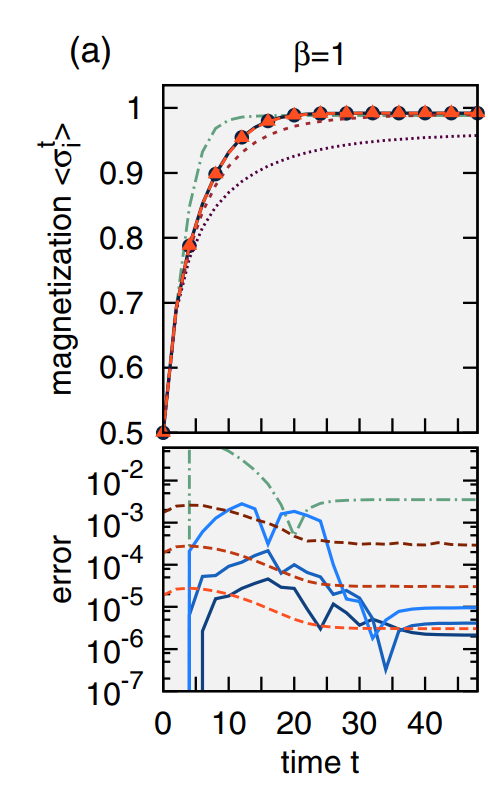

In [ ]:
@telegram begin
@time begin
c = autocovariance(A, U)
end
end

In [ ]:
using ColorSchemes
us = 2:2:(T-1)
cg = cgrad(:matter, length(us), categorical=true)
pl = plot(xlabel="u-t", ylabel="correlation", legend=:outertopright)
for (j,u) in enumerate(us)
    plot!(pl, 1:u-1, c[2:u,u+1], label="u=$u", m=:o, c=cg[j]) 
end
pl